
<img src="../images/5thNRST_logo.png" alt="NOWPAP" width="900" height="700">

## NOWPAP REMOTE SENSING TRAINING COURSE   
#### Webinar 2: Monitoring and Assessment of Water Quality by Ocean Color Remote Sensing
<span style="color:brown; font-size:1.1em;font-style:italic"> Time series analysis: Extract annual max from monthly images</span>

<hr style="border:2px solid rgb(30,70,125)"> </hr>

<span style="font-family:Helvieta; font-size:2em;">Eligio Maure (maure@npec.or.jp)</span>

***
**Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Cell" and select "Run All Above Selected Cell".<br>
***

# Table of contents
- [1. Purpose](#1.-Purpose)
- [2. Library import](#2.-Library-import)
- [3. Define parameters](#3.-Define-parameters)
- [4. Annual Max](#4.-Annual-Max)
- [5. Annual Min](#5.-Annual-Min)
- [6. Resources](#6.-Resources)
***

# 1. Purpose
[Return to the "Table of contents"](#Table-of-contents)

The objective of this exercise is to learn how to extract annual min/max from a series of satellite images.  
The images used are obtained from the [Marine Environmental Watch](https://ocean.nowpap3.go.jp/?page_id=862) of Northwest Pacific Action Plan (NOWPAP).

You will learn how to use [NumPy](https://numpy.org/) to extract annual min/max and the time when it occurs.
***

# 2. Library import
[Return to the "Table of contents"](#Table-of-contents)

In [11]:
# Data manipulation
import numpy as np
from netCDF4 import Dataset, num2date

# System
import sys
from pathlib import Path

# Visualization
import matplotlib.pyplot as plt
from matplotlib import ticker, colors

%matplotlib inline

In [12]:
sys.path.append(str(Path('.').absolute().parent)) 
import sutils as util
util.mpl_custom(mpl=plt)

# 3. Define parameters
[Return to the "Table of contents"](#Table-of-contents)

In [32]:
VAR = 'chlor_a'    # variable name 

INTPUT_DIR = Path('.').absolute().joinpath(r'data\SGLI\month')
OUTPUT_DIR = Path('.').absolute().joinpath(r'data\SGLI\month')

INPUT_FILES = list(INTPUT_DIR.glob('GS2020*.nc'))

# 4. Annual Max
[Return to the "Table of contents"](#Table-of-contents)
- Get annual max and display the time of max

In [4]:
amax, dmax = util.get_min_max(
    files=INPUT_FILES
    , varname='chlor_a'
    , case='max')

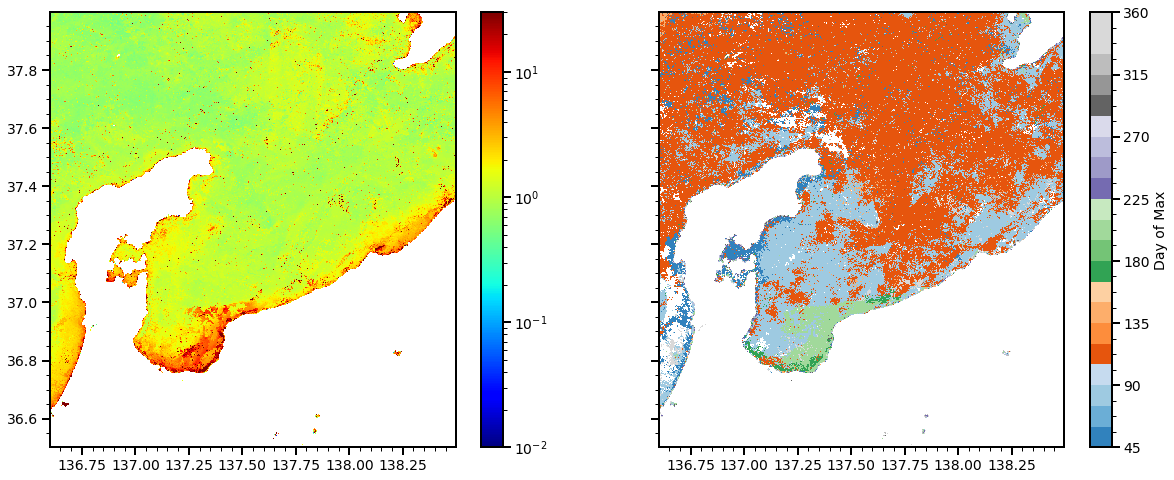

In [8]:
fig, ax = plt.subplots(1,2, figsize=(20,8), sharey=True)

with Dataset(INPUT_FILES[0], 'r') as nc:
    lat = nc['lat'][:]
    lon = nc['lon'][:]

# LogNorm for chlorophyll data
m1 = ax[0].pcolormesh(lon, lat, amax, cmap='jet', norm=colors.LogNorm(vmin=0.01, vmax=30))

# linear scale for count data
levels = ticker.MaxNLocator(nbins=25).tick_values(dmax.min(), dmax.max())
norm = colors.BoundaryNorm(boundaries=levels, ncolors=levels.size, clip=True)
m2 = ax[1].pcolormesh(lon, lat, dmax, cmap='tab20c', norm=norm)

plt.colorbar(m1, ax=ax[0], orientation='vertical')
plt.colorbar(m2, ax=ax[1], orientation='vertical')

# 5. Annual Min
[Return to the "Table of contents"](#Table-of-contents)
- Get annual max and display the time of max

In [6]:
amin, dmin = util.get_min_max(
    files=INPUT_FILES
    , varname='chlor_a'
    , case='min')

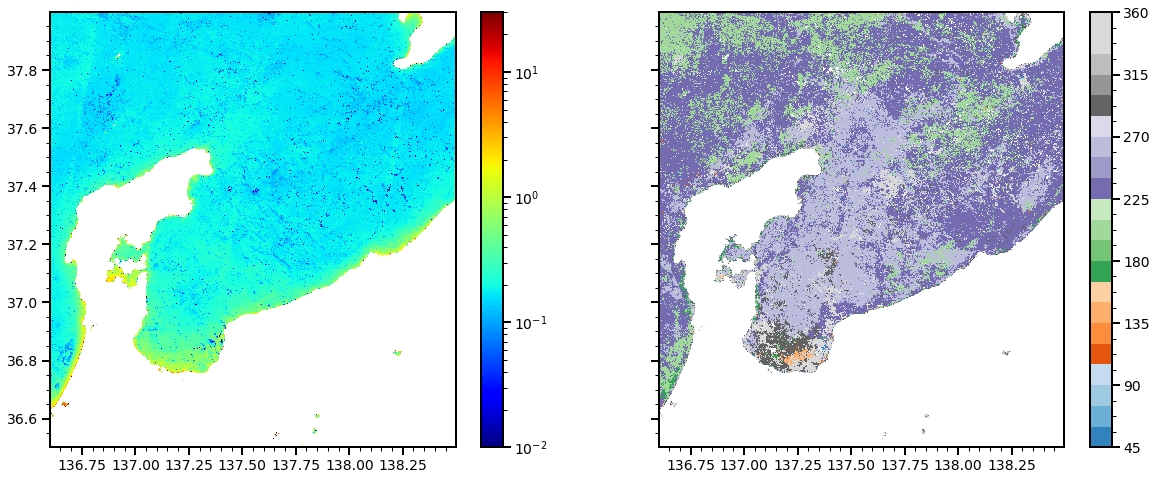

In [7]:
fig, ax = plt.subplots(1,2, figsize=(20,8), sharey=True)

# LogNorm for chlorophyll data
m1 = ax[0].pcolormesh(lon, lat, amin
                      , cmap='jet', norm=colors.LogNorm(vmin=0.01, vmax=30))

# linear scale for count data
levels = ticker.MaxNLocator(nbins=25).tick_values(dmin.min(), dmin.max())
norm = colors.BoundaryNorm(boundaries=levels, ncolors=levels.size, clip=True)
m2 = ax[1].pcolormesh(lon, lat, dmin, cmap='tab20c', norm=norm)

plt.colorbar(m1, ax=ax[0], orientation='vertical')
plt.colorbar(m2, ax=ax[1], orientation='vertical')

<div class="alert alert-block alert-success"/div>
    <b>Done!</b><br>
  
--- 

#### And thank you for your attention! :) 
    Now try the same exercise with other years or sensors, etc.
    We hope you enjoyed the training provided by NOWPAP CEARAC.

# 5. Resources
[Go back to the "Table of contents"](#Table-of-contents)
1. https://numpy.org/doc/stable/reference/generated/numpy.amax.html
2. https://matplotlib.org/
4. https://ocean.nowpap3.go.jp/?page_id=862
5. https://github.com/npec/5th-NOWPAP-Training-Course-on-Remote-Sensing-Data-Analysis